# Dealing with Missing Values


## Types of Missing Values

- `.`
- `NA`
- 

## Causes of Missing Values

## Workflow of Dealing with Missing Values

## Patterns for Missing Values


### Table of Contents

- [Example 1. `0` as missing values]()
- [Example 2. `.` as missing values]()
- [Example 3. Use `missingno` library]()

In [1]:
import os 

os.chdir('projects_on_GitHub/POC/Dealing_with_Missing_Values')

### Example 1: `0` as missing values.

In [87]:
pima_df = pd.read_csv('pima-indians-diabetes data.csv', index_col=0)
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 60.0 KB


In [88]:
pima_df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,31.924439,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,7.840230,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.500000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


`BMI` 的最小值为0，不符合常识，因此需要将0替换为`np.nan`.

In [89]:
# Find the records whose `BMI` equals to 0
pima_df[pima_df.BMI==0]

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
78,0.0,131.0,NaN,NaN,NaN,0.0,0.270,26,1.0
117,5.0,78.0,48.0,NaN,NaN,0.0,0.654,25,0.0
238,9.0,164.0,84.0,21.0,NaN,0.0,0.831,32,1.0
252,2.0,90.0,80.0,14.0,55.0,0.0,0.249,24,0.0
328,2.0,102.0,86.0,36.0,120.0,0.0,0.127,23,1.0
445,0.0,180.0,78.0,63.0,14.0,0.0,2.420,25,1.0
493,4.0,125.0,70.0,18.0,122.0,0.0,1.144,45,1.0
549,4.0,189.0,110.0,31.0,NaN,0.0,0.680,37,0.0
575,1.0,119.0,44.0,47.0,63.0,0.0,0.280,25,0.0
726,1.0,116.0,78.0,29.0,180.0,0.0,0.496,25,0.0


In [90]:
# Find the records whose `BMI` originally are `np.nan`
pima_df.BMI[np.isnan(pima_df.BMI)]

9     NaN
49    NaN
60    NaN
81    NaN
145   NaN
371   NaN
426   NaN
494   NaN
522   NaN
684   NaN
706   NaN
Name: BMI, dtype: float64

In [78]:
# Replace `0` with `np.nan`
pima_df.loc[pima_df.BMI==0, 'BMI'] = np.nan

In [79]:
# Verify whether there is `0` in `BMI`
pima_df.describe()

,Pregnant,Glucose,Diastolic_BP,Skin_Fold,Serum_Insulin,BMI,Diabetes_Pedigree,Age,Class
count,768.000000,763.000000,733.000000,541.000000,394.000000,746.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.395174,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.863437,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.425000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.250000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [86]:
# Print the 'NaN' values in the column BMI
print(pima_df.BMI[np.isnan(pima_df.BMI)])

9     NaN
49    NaN
60    NaN
78    NaN
81    NaN
117   NaN
145   NaN
238   NaN
252   NaN
328   NaN
371   NaN
426   NaN
445   NaN
493   NaN
494   NaN
522   NaN
549   NaN
575   NaN
684   NaN
706   NaN
726   NaN
758   NaN
Name: BMI, dtype: float64


### Example 2. `.` as missing values

In [80]:
# Read the dataset 'college.csv'
college1 = pd.read_csv('college.csv')
print(college1.head())

  gradrat            lenroll rmbrd  private stufac    csat   act
0    59.0       5.1761497326  3.75      1.0   10.8       .  21.0
1    52.0       4.7791234931  3.74      1.0   17.7       .  21.0
2    75.0  6.122492809500001     .      1.0   11.4  1052.0  24.0
3    56.0       5.3181199938   4.1      1.0   11.6   940.0  23.0
4    71.0  5.631211781799999     .      1.0   18.3       .  17.0


In [81]:
college1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gradrat  200 non-null    object 
 1   lenroll  200 non-null    object 
 2   rmbrd    200 non-null    object 
 3   private  200 non-null    float64
 4   stufac   200 non-null    object 
 5   csat     200 non-null    object 
 6   act      200 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.1+ KB


In [82]:
# By sorting it may find some abnormal values
np.sort(college.csat.unique())

array(['.', '1000.0', '1006.0', '1010.0', '1013.0', '1020.0', '1024.0',
       '1026.0', '1028.0', '1036.0', '1039.0', '1040.0', '1044.0',
       '1045.0', '1050.0', '1052.0', '1060.0', '1070.0', '1080.0',
       '1092.0', '1096.0', '1109.0', '1111.0', '1120.0', '1139.0',
       '1150.0', '1171.0', '1200.0', '1210.0', '1220.0', '1230.0',
       '1270.0', '1292.0', '1324.0', '1381.0', '741.0', '763.0', '764.0',
       '782.0', '800.0', '802.0', '810.0', '813.0', '814.0', '816.0',
       '825.0', '830.0', '832.0', '837.0', '843.0', '846.0', '850.0',
       '853.0', '854.0', '860.0', '863.0', '867.0', '871.0', '880.0',
       '881.0', '885.0', '890.0', '891.0', '895.0', '897.0', '900.0',
       '902.0', '905.0', '911.0', '917.0', '919.0', '923.0', '937.0',
       '940.0', '943.0', '947.0', '950.0', '951.0', '964.0', '970.0',
       '979.0', '980.0', '989.0', '992.0', '994.0', '996.0', '997.0',
       '998.0'], dtype=object)

**Use `na_values` in `pd.read_csv` to replace certain values as `np.nan`.**

In [83]:
college2 = pd.read_csv('college.csv', na_values='.')
np.sort(college2.csat.unique())

array([ 741.,  763.,  764.,  782.,  800.,  802.,  810.,  813.,  814.,
        816.,  825.,  830.,  832.,  837.,  843.,  846.,  850.,  853.,
        854.,  860.,  863.,  867.,  871.,  880.,  881.,  885.,  890.,
        891.,  895.,  897.,  900.,  902.,  905.,  911.,  917.,  919.,
        923.,  937.,  940.,  943.,  947.,  950.,  951.,  964.,  970.,
        979.,  980.,  989.,  992.,  994.,  996.,  997.,  998., 1000.,
       1006., 1010., 1013., 1020., 1024., 1026., 1028., 1036., 1039.,
       1040., 1044., 1045., 1050., 1052., 1060., 1070., 1080., 1092.,
       1096., 1109., 1111., 1120., 1139., 1150., 1171., 1200., 1210.,
       1220., 1230., 1270., 1292., 1324., 1381.,   nan])

In [84]:
college2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gradrat  187 non-null    float64
 1   lenroll  199 non-null    float64
 2   rmbrd    114 non-null    float64
 3   private  200 non-null    float64
 4   stufac   199 non-null    float64
 5   csat     105 non-null    float64
 6   act      104 non-null    float64
dtypes: float64(7)
memory usage: 11.1 KB


In [85]:
college1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gradrat  200 non-null    object 
 1   lenroll  200 non-null    object 
 2   rmbrd    200 non-null    object 
 3   private  200 non-null    float64
 4   stufac   200 non-null    object 
 5   csat     200 non-null    object 
 6   act      200 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.1+ KB


### Example 3. Count the frequency and relative frequency of missing values.

In [92]:
# Load the airquality dataset
airquality = pd.read_csv('air-quality.csv', parse_dates=['Date'], index_col='Date')

# Create a nullity DataFrame airquality_nullity
airquality_nullity = airquality.isnull()
print(airquality_nullity.head())
print()

# Calculate total of missing values
missing_values_sum = airquality_nullity.sum()
print('Total Missing Values:\n', missing_values_sum)
print()

# Calculate percentage of missing values
missing_values_percent = airquality_nullity.mean() * 100
print('Percentage of Missing Values:\n', missing_values_percent)

            Ozone  Solar   Wind   Temp
Date                                  
1976-05-01  False  False  False  False
1976-05-02  False  False  False  False
1976-05-03  False  False  False  False
1976-05-04  False  False  False  False
1976-05-05   True   True  False  False

Total Missing Values:
 Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

Percentage of Missing Values:
 Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


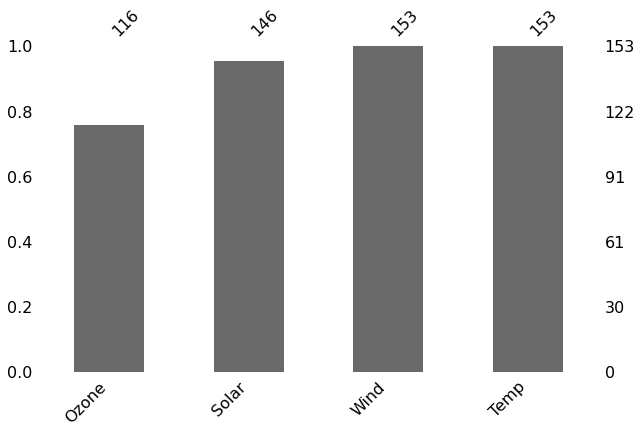

In [96]:
# Import missingno as msno
import missingno as msno

# Plot amount of missingness
msno.bar(airquality, figsize=(10, 6));


<AxesSubplot:>

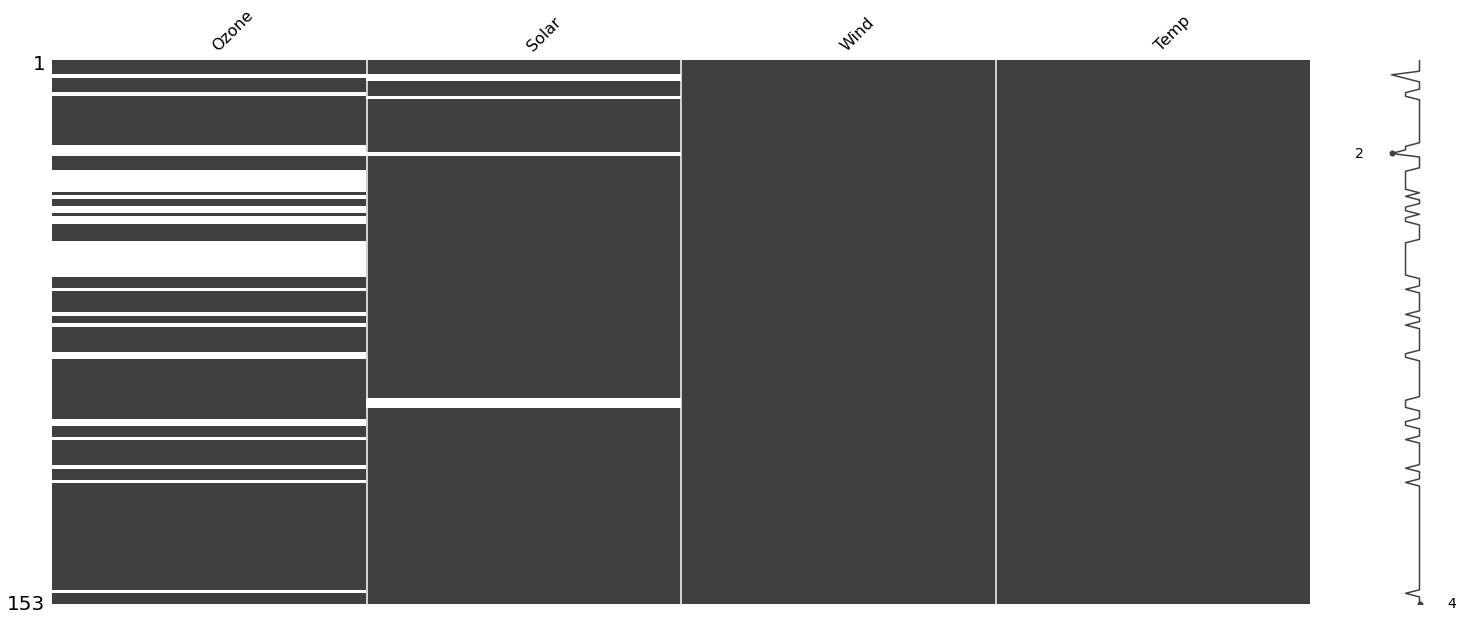

In [97]:
# Plot nullity matrix of airquality
msno.matrix(airquality);

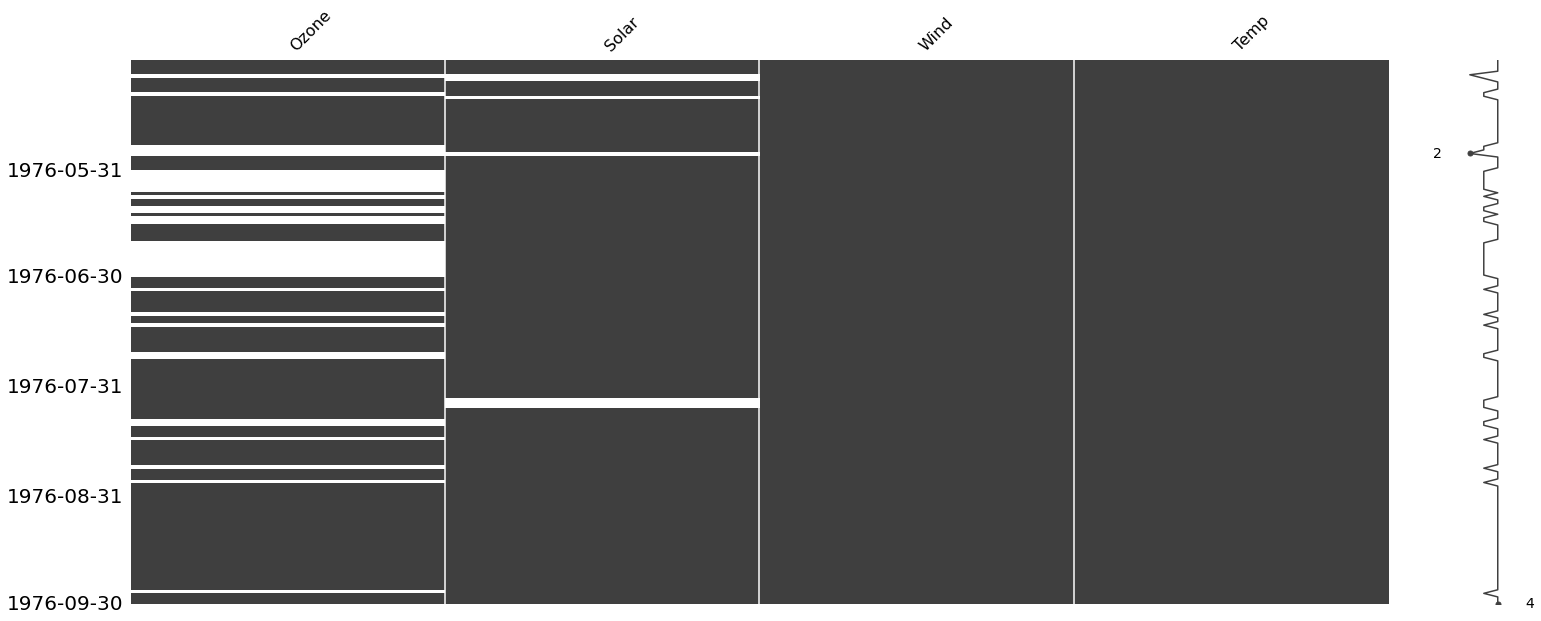

In [99]:
# Plot nullity matrix of airquality with frequency 'M'
msno.matrix(airquality, freq='M');

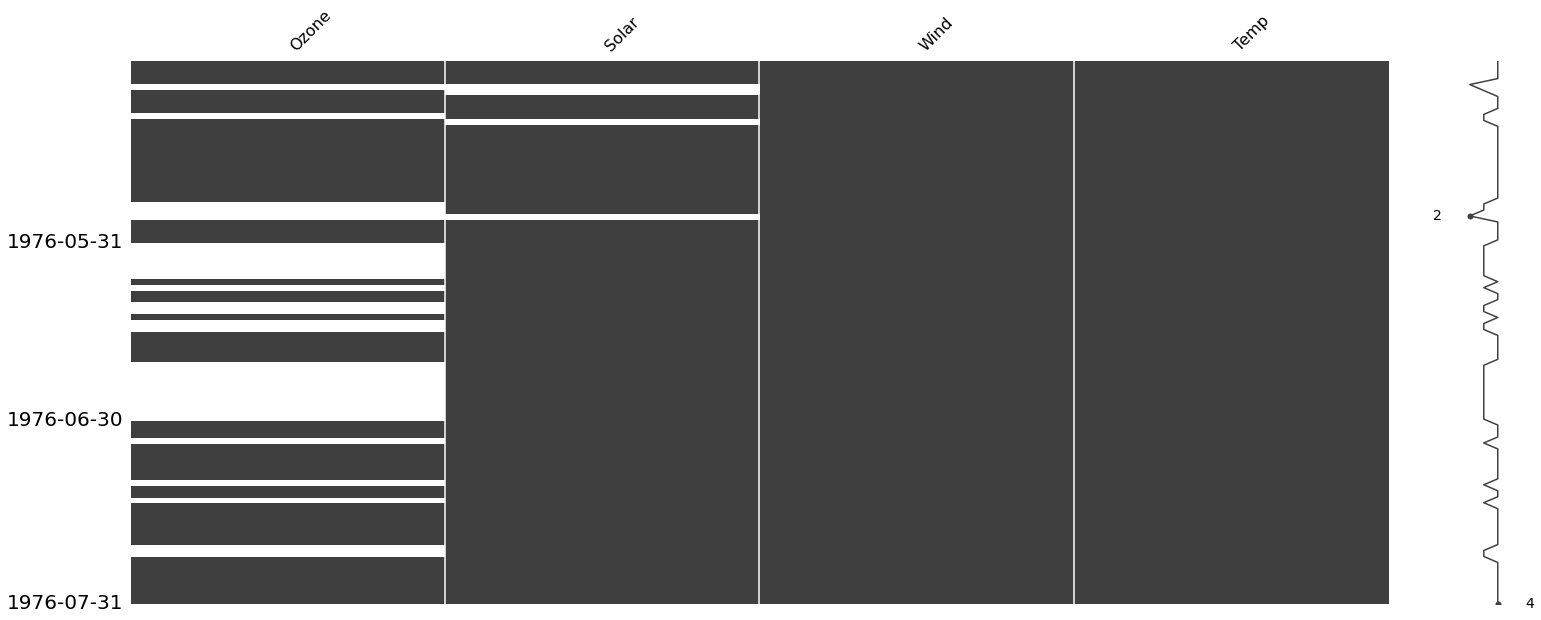

In [101]:
# Plot the sliced nullity matrix of airquality with frequency 'M'
msno.matrix(airquality.loc['1976-05':'1976-07'], freq='M');

In [102]:
diabetes = pd.read_csv('pima-indians-diabetes data.csv', index_col=0)
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pregnant           768 non-null    float64
 1   Glucose            763 non-null    float64
 2   Diastolic_BP       733 non-null    float64
 3   Skin_Fold          541 non-null    float64
 4   Serum_Insulin      394 non-null    float64
 5   BMI                757 non-null    float64
 6   Diabetes_Pedigree  768 non-null    float64
 7   Age                768 non-null    int64  
 8   Class              768 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 60.0 KB


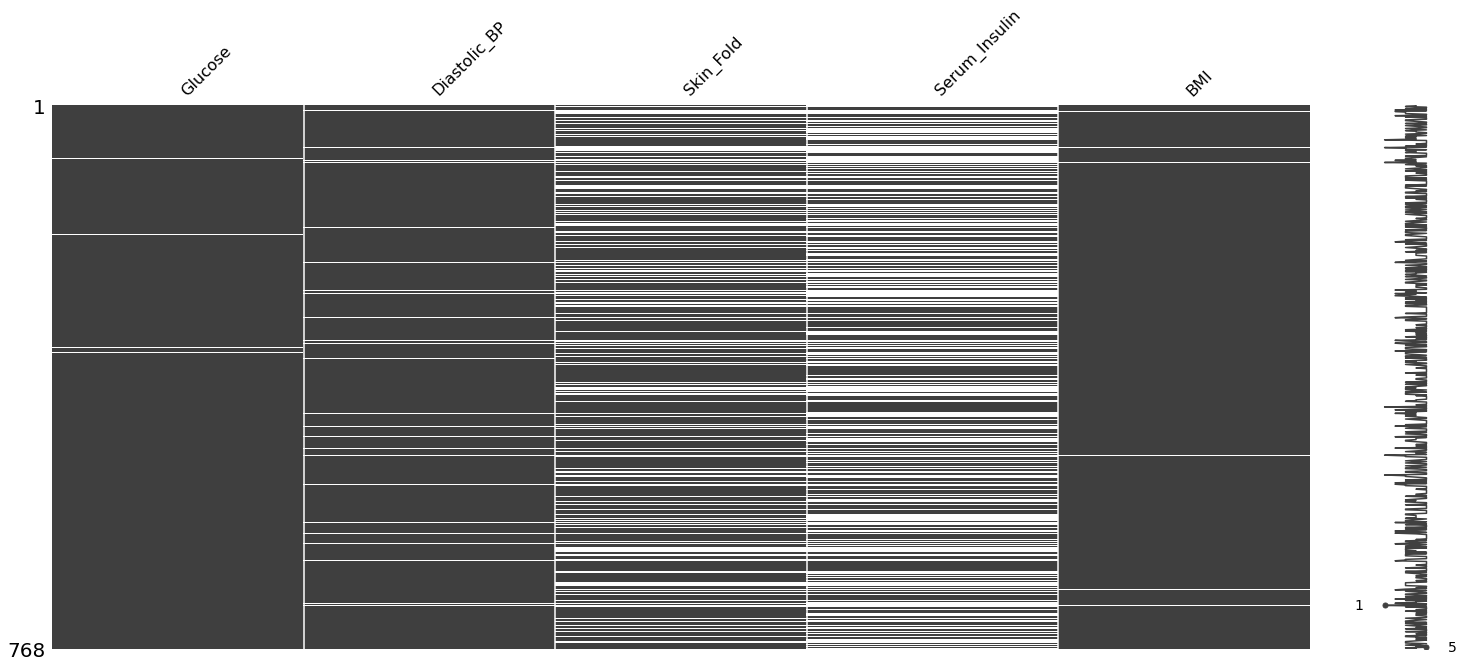

In [104]:
msno.matrix(diabetes.iloc[:, 1:-3]);

<AxesSubplot:>

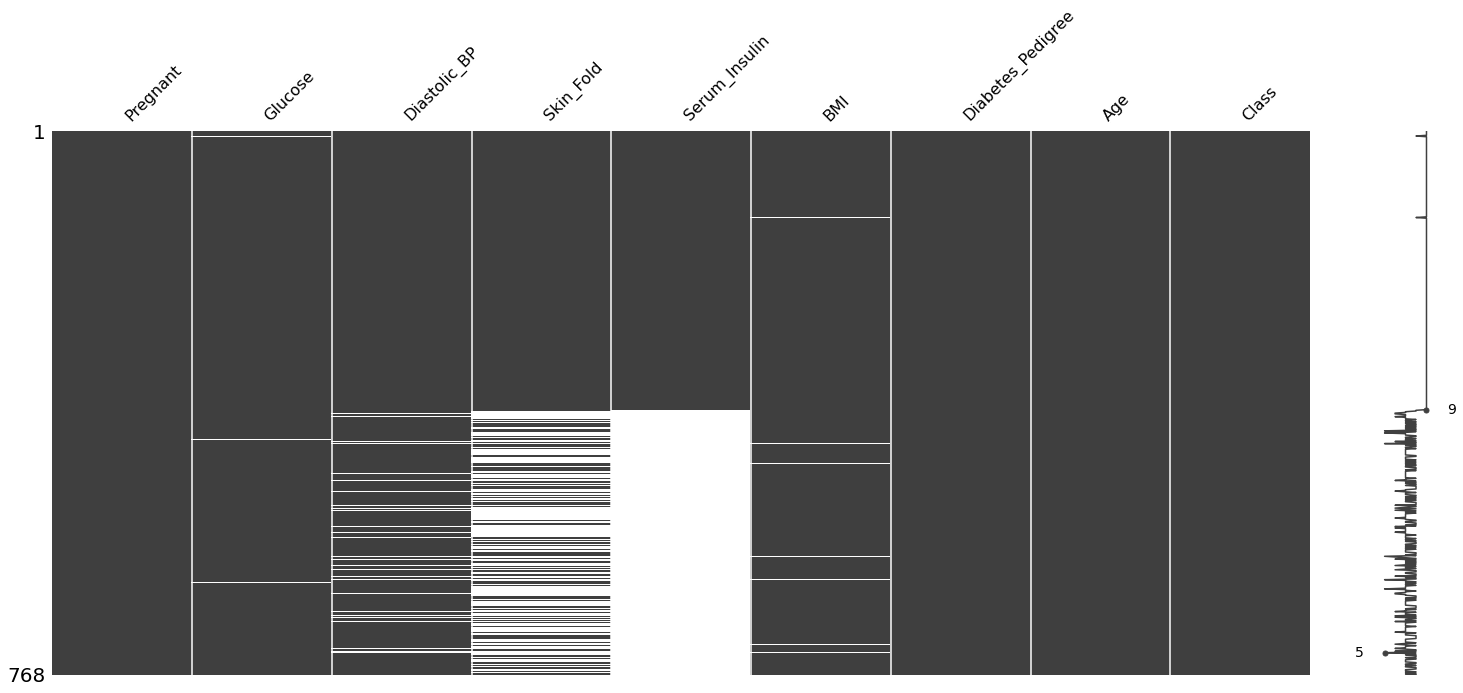

In [106]:
sorted_ = diabetes.sort_values('Serum_Insulin')
msno.matrix(sorted_)

___Summay:___ While Serum_Insulin is definitely **not missing at random**, Glucose is most likely **missing completely at random**.

### Example 4. Heatmaps and Dendrograms in `missingno` Library

In [107]:
diabetes = pd.read_csv('pima-indians-diabetes data.csv', index_col=0)

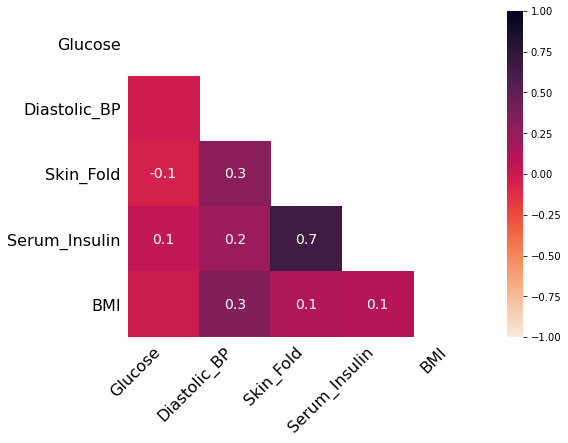

In [112]:
# Plot missingness heatmap of diabetes
msno.heatmap(diabetes, cmap='rocket_r', figsize=(8, 6));

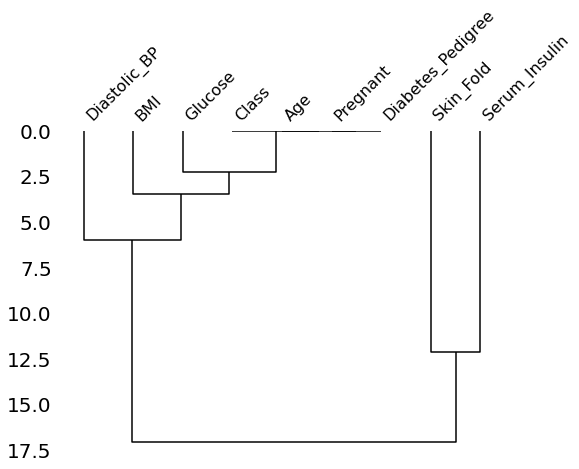

In [113]:
# Plot missingness dendrogram of diabetes
msno.dendrogram(diabetes, figsize=(8, 6));